# Modularization and Documentation

Now that we've covered some of the basic syntax and libraries in Python we can start to tackle our data analysis problem.
We are interested in understanding the relationship between the weather and the number of mosquitos so that we can plan mosquito control measures.
Since we want to apply these mosquito control measures at a number of different sites we need to understand how the relationship varies across sites.
Remember that we have a series of CSV files with each file containing the data for a single location.

## Objectives

* Write code for people, not computers
* Break a program into chunks
* Write and use functions in Python
* Write useful documentation

## Starting small

When approaching computational tasks like this one it is typically best to start small,
check each piece of code as you go,
and make incremental changes.
This helps avoid marathon debugging sessions
because it's much easier to debug one small piece of the code at a time than to write 100 lines of code and
then try to figure out all of the different bugs in it.

Let's start by reading in the data from a single file and conducting a simple regression analysis on it.
In fact, I would actually start by just importing the data and making sure that everything is coming in OK.

In [1]:
import pandas as pd

d = pd.read_csv('A2_mosquito_data.csv')
print(d)

    year  temperature  rainfall  mosquitos
0   1960           82       200        180
1   1961           70       227        194
2   1962           89       231        207
3   1963           74       114        121
4   1964           78       147        140
5   1965           85       151        148
6   1966           86       172        162
7   1967           75       106        112
8   1968           70       276        230
9   1969           86       165        162
10  1970           83       222        198
11  1971           78       297        247
12  1972           87       288        248
13  1973           76       286        239
14  1974           86       231        202
15  1975           90       284        243
16  1976           76       190        175
17  1977           87       257        225
18  1978           88       128        133
19  1979           87       218        199
20  1980           81       206        184
21  1981           74       175        160
22  1982   

The import seems to be working properly, so that's good news,
but does anyone have anyone see anything about the code that they don't like?

That's right.
The variable name I've chosen for the data doesn't really communicate any information to anyone about what it's holding,
which means that when I come back to my code next month to change something I'm going to have a more difficult time understanding what the code is actually doing.
This brings us to one of our first major lessons for the morning,
which is that in order to understand what our code is doing so that we can quickly make changes in the future,
we need to *write code for people, not computers*,
and an important first step is to *use meaningful varible names*.

In [2]:
import pandas as pd

data = pd.read_csv('A2_mosquito_data.csv', index_col='year')
print(data.head())

      temperature  rainfall  mosquitos
year                                  
1960           82       200        180
1961           70       227        194
1962           89       231        207
1963           74       114        121
1964           78       147        140


The `.head()` method lets us just look at the first few rows of the data.
A method is a function attached to an object that operates on that object.
So in this case we can think of it as being equivalent to `head(data)`.

Everything looks good,
but either global warming has gotten *really* out of control or the temperatures are in degrees Fahrenheit.
Let's convert them to Celcius before we get started.

We don't need to reimport the data in our new cell because all of the executed cells in IPython Notebook share the same workspace.
However, it's worth noting that if we close the notebook and then open it again it is necessary to rerun all of the individual blocks of code that a code block relies on before continuing.
To rerun all of the cells in a notebook you can select `Cell -> Run All` from the menu.

In [3]:
data['temperature'] = (data['temperature'] - 32) * 5 / 9.0
print(data.head())

      temperature  rainfall  mosquitos
year                                  
1960    27.777778       200        180
1961    21.111111       227        194
1962    31.666667       231        207
1963    23.333333       114        121
1964    25.555556       147        140


That's better.
Now let's go ahead and conduct a regression on the data.
We'll use the `statsmodels` library to conduct the regression.

In [31]:
import statsmodels.api as sm

regr_results = sm.OLS.from_formula('mosquitos ~ temperature', data).fit()
regr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mosquitos   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.1735
Date:                Thu, 12 Feb 2015   Prob (F-statistic):              0.679
Time:                        16:14:04   Log-Likelihood:                -259.30
No. Observations:                  51   AIC:                             522.6
Df Residuals:                      49   BIC:                             526.5
Df Model:                           1                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     166.7158     44.813      3.720      0.001        76.660   256.771
temperature     0.6889      1.654      0.417      0.679        -2.635     4.012
==============================================================================
Omnibus:                        8.529   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                2.660
Skew:                          -0.072   Prob(JB):                        0.265
Kurtosis:                       1.891   Cond. No.                         218.
==============================================================================
"""

As you can see `statsmodels` lets us use the names of the columns in our dataframe
to clearly specify the form of the statistical model we want to fit.
This also makes the code more readable since the model we are fitting is written in a nice,
human readable, manner.
The `summary` method gives us a visual representation of the results.
This summary is nice to look at, but it isn't really useful for doing more computation,
so we can look up particular values related to the regression using the `regr_results` attributes.
These are variables that are attached to `regr_results`.

In [32]:
print(regr_results.params)
print(regr_results.rsquared)

Intercept      166.715804
temperature      0.688853
dtype: float64
0.00352781828497


If we want to hold onto these values for later we can assign them to variables:

In [33]:
parameters = regr_results.params
rsquared = regr_results.rsquared

And then we can plot the observed data against the values predicted by our regression to visualize the results.
First, remember to tell the notebook that we want our plots to appear in the notebook itself.

In [34]:
%matplotlib inline

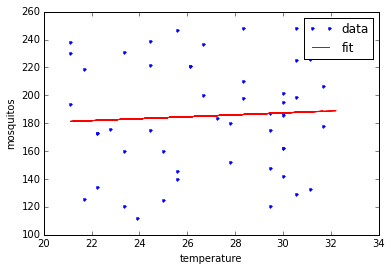

In [40]:
import matplotlib.pyplot as plt

line_fit = parameters['Intercept'] + parameters['temperature'] * data['temperature']
plt.plot(data['temperature'], data['mosquitos'], '.', label="data")
plt.plot(data['temperature'], line_fit, 'red', label="fit")
plt.xlabel('temperature')
plt.ylabel('mosquitos')
plt.legend()

### Challenge

Repeat the fit and the plotting using `rainfall` instead, does it get better?

OK, great.
So putting this all together we now have a piece of code that imports the modules we need,
loads the data into memory, fits a regression to the data,
and prints the parameters and plots data and fit.

Intercept    41.159816
rainfall      0.695885
dtype: float64
R^2 =  0.991315935461


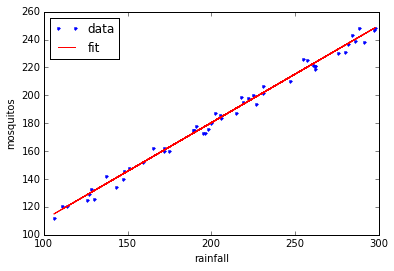

In [46]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_csv('A2_mosquito_data.csv')
data['temperature'] = (data['temperature'] - 32) * 5 / 9.0
regr_results = sm.OLS.from_formula('mosquitos ~ rainfall', data).fit()
parameters = regr_results.params
rsquared = regr_results.rsquared
line_fit = parameters['Intercept'] + parameters['rainfall'] * data['rainfall']
plt.plot(data['rainfall'], data['mosquitos'], '.', label="data")
plt.plot(data['rainfall'], line_fit, 'red', label="fit")
plt.xlabel('rainfall')
plt.ylabel('mosquitos')
plt.legend(loc='best')
print(parameters)
print("R^2 = ", rsquared)

## Functions

The next thing we need to do is loop over all of the possible data files,
but in order to do that we're going to need to grow our code some more.
Since our brain can only easily hold 5-7 pieces of information at once,
and our code already has more than that many pieces,
we need to start breaking our code into manageable sized chunks.
This will let us read and understand the code more easily and make it easier to reuse pieces of our code.
We'll do this using functions.

Functions in Python take the general form

~~~python
def function_name(inputs):
    do stuff
    return output
~~~

So, if we want to write a function that returns the value of a number squared we could use:

In [47]:
def square(x):
    x_squared = x ** 2
    return x_squared

print("Four squared is", square(4))
print("Five squared is", square(5))

Four squared is 16
Five squared is 25


We can also just return the desired value directly.

In [48]:
def square(x):
    return x ** 2

print(square(3))

9


And remember, if we want to use the result of the function later we need to store it somewhere.

In [49]:
two_squared = square(2)
print(two_squared)

4


### Challenges

1\. Write a function that converts temperature from Fahrenheit to Celsius and use it to replace

~~~python
data['temperature'] = (data['temperature'] - 32) * 5 / 9.0
~~~

in our program.

2\. Write a function called `analyze()` that takes `data` as an input, performs the regression, makes the plot, and returns `parameters`.

In [54]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def fahr_to_celsius(temp_fahr):
    temp_celsius = (temp_fahr - 32) * 5 / 9.0
    return temp_celsius

def analyze(data):
    data['temperature'] = (data['temperature'] - 32) * 5 / 9.0
    regr_results = sm.OLS.from_formula('mosquitos ~ rainfall', data).fit()
    parameters = regr_results.params
    rsquared = regr_results.rsquared
    line_fit = parameters['Intercept'] + parameters['rainfall'] * data['rainfall']
    plt.plot(data['rainfall'], data['mosquitos'], '.', label="data")
    plt.plot(data['rainfall'], line_fit, 'red', label="fit")
    plt.xlabel('rainfall')
    plt.ylabel('mosquitos')
    plt.legend(loc='best')
    return parameters

Intercept    41.159816
rainfall      0.695885
dtype: float64


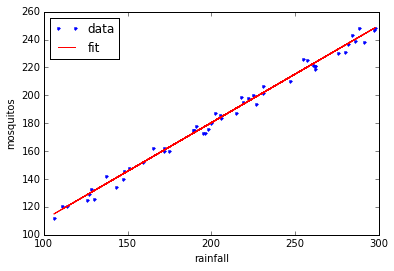

In [70]:
data_A2 = pd.read_csv('A2_mosquito_data.csv')
parameters_A2 = analyze(data)
print(parameters_A2)

## The call stack

Let's take a closer look at what happens when we call fahr_to_celsius(32.0). To make things clearer, we'll start by putting the initial value 32.0 in a variable and store the final result in one as well.

(A useful tool for visualizing the call stack: http://pythontutor.com/visualize.html)

In [65]:
def fahr_to_celsius(temp_fahr):
    temp_celsius = (temp_fahr - 32) * 5 / 9.0
    return temp_celsius

original = 32.0
final = fahr_to_celsius(original)

#### Call Stack (Initial State)

When the first three lines of this function are executed the function is created,
but nothing happens.
The function is like a recipe,
it contains the information about how to do something,
but it doesn't do so until you explicitly ask it to.
We then create the variable `original` and assign the value 32.0 to it.
The values `tempF` and `tempC` don't currently exist. 

#### Call Stack Immediately After Function Call

When we call `fahr_to_celsius`,
Python creates another stack frame to hold fahr_to_celsius's variables.
Upon creation this stack frame only includes the inputs being passed to the function,
so in our case `tempF`.
As the function is executed variables created by the function are stored in the functions stack frame,
so `tempC` is created in the `fahr_to_celsius` stack frame.

#### Call Stack At End Of Function Call

When the call to `fahr_to_celsius` returns a value,
Python throws away `fahr_to_celsius`'s stack frame,
including all of the variables it contains,
and creates a new variable
in the original stack frame to hold the temperature in Celsius.

#### Call Stack After End

This final stack frame is always there;
it holds the variables we defined outside the functions in our code.
What it doesn't hold is the variables that were in the other stack frames.
If we try to get the value of `tempF` or `tempC` after our functions have finished running,
Python tells us that there's no such thing:


In [66]:
# print(temp_celsius)

The reason for this is encapsulation,
and it's one of the key to writing correct, comprehensible programs.
A function's job is to turn several operations into one so that we can think about
a single function call instead of a dozen or a hundred statements each time we want to do something.
That only works if functions don't interfere with each other by potentially changing the same variables;
if they do, we have to pay attention to the details once again,
which quickly overloads our short-term memory.

### Challenge

What about `temp_fahr`, it appears in the function call, is that defined?

## Documentation

We should write some [documentation](../../gloss.html#documentation)
to remind ourselves later what it's for and how to use it.
This function may be fairly straightforward,
but in most cases it won't be so easy to remember exactly what a function is doing in a few months.
Just imagine looking at our `analyze` function a few months in the future
and trying to remember exactly what it was doing just based on the code.

The usual way to put documentation in code is to add [comments](../../gloss.html#comment) like this:

In [73]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def fahr_to_celsius(temp_fahr):
    temp_celsius = (temp_fahr - 32) * 5 / 9.0
    return temp_celsius

def analyze(data):
    data['temperature'] = fahr_to_celsius(data['temperature'])
    # linear fit
    regr_results = sm.OLS.from_formula('mosquitos ~ rainfall', data).fit()
    parameters = regr_results.params
    line_fit = parameters['Intercept'] + parameters['rainfall'] * data['rainfall']
    # plotting
    plt.plot(data['rainfall'], data['mosquitos'], '.', label="data")
    plt.plot(data['rainfall'], line_fit, 'red', label="fit")
    plt.xlabel('rainfall')
    plt.ylabel('mosquitos')
    plt.legend(loc='best')
    return parameters

There's a better way to do this in Python.
If the first thing in a function is a string that isn't assigned to a variable,
that string is attached to the function as its documentation:

In [75]:
def fahr_to_celsius(temp_fahr):
    """Convert temperature from Fahrenheit to Celsius"""
    temp_celsius = (temp_fahr - 32) * 5 / 9.0
    return temp_celsius

### Challenge

Write docstring for the `analyze` function, remember to be specific on the type of the input, its expected properties, what is performed by the function and what is returned

In [75]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def fahr_to_celsius(temp_fahr):
    """Convert temperature from Fahrenheit to Celsius"""
    temp_celsius = (temp_fahr - 32) * 5 / 9.0
    return temp_celsius

def analyze(data):
    """Perform regression analysis on mosquito data
   
    Performs a linear regression based on rainfall.
    Creates a plot of the result and returns fit parameters.
    
    Parameters
    ----------
    data : pandas.Dataframe
        Column named 'temperature', 'rainfall' and 'mosquitos'.
            
    Returns
    -------
    parameters : pandas.Series
        Fit parameters named Intercept and rainfall
    
    """
    data['temperature'] = fahr_to_celsius(data['temperature'])
    # linear fit
    regr_results = sm.OLS.from_formula('mosquitos ~ rainfall', data).fit()
    parameters = regr_results.params
    line_fit = parameters['Intercept'] + parameters['rainfall'] * data['rainfall']
    # plotting
    plt.plot(data['rainfall'], data['mosquitos'], '.', label="data")
    plt.plot(data['rainfall'], line_fit, 'red', label="fit")
    plt.xlabel('rainfall')
    plt.ylabel('mosquitos')
    plt.legend(loc='best')
    return parameters

This is better because we can now ask Python's built-in help system to show us the documentation for the function.

In [76]:
help(analyze)

Help on function analyze in module __main__:

analyze(data)
    Perform regression analysis on mosquito data
    
    Performs a linear regression based on rainfall.
    Creates a plot of the result and returns fit parameters.
    
    Parameters
    ----------
    data : pandas.Dataframe
        Column named 'temperature', 'rainfall' and 'mosquitos'.
            
    Returns
    -------
    parameters : pandas.Series
        Fit parameters named Intercept and rainfall



A string like this is called a [docstring](../../gloss.html#docstring)
and there are also automatic documentation generators that use these docstrings to produce documentation for users.
We use triple quotes because
it allows us to include multiple lines of text and because it is considered good Python style.